<a href="https://colab.research.google.com/github/AkshayaaChandrasekaran04/Computer-vision/blob/main/Weather_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/My Drive"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'Anna.Karenina.2012.720p.BluRay.x264.999MB-[Mkvking.com].mkv'
'Colab Notebooks'
 GDToT
'Getting started.pdf'
 google-cluster-data-1.csv
'Gugel Deref Sharer'
 Jovian
 ME
 Sharer.pw
 test.csv.gsheet
 weather_database.zip
 YuuDrive


In [ ]:
!unzip /content/drive/MyDrive/weather_database.zip

Archive:  /content/drive/MyDrive/weather_database.zip
replace weather_database/cloudy/0001.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace weather_database/cloudy/0002.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [2]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D,Dense
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import cv2
import os
os.listdir('/content/weather_database/')

['sunny', 'cloudy']

In [3]:
sunny_dir='/content/weather_database/sunny/'
cloudy_dir='/content/weather_database/cloudy/'

In [4]:
x = []
y = []

In [5]:
img_size=(64,64)
def make_whole_dataset(directory,weather):
    try:
        for img in os.listdir(directory):
            path = os.path.join(directory,img)
            img_array = cv2.imread(path,cv2.IMREAD_COLOR)
            img_array = cv2.resize(img_array,img_size)
            x.append(np.array(img_array))
            y.append(str(weather))
    except:
        None

    print("weather {} has been added to Dataset Successfully".format(weather))

In [6]:
make_whole_dataset(sunny_dir,"Sunny")
make_whole_dataset(cloudy_dir,"Cloudy")

weather Sunny has been added to Dataset Successfully
weather Cloudy has been added to Dataset Successfully


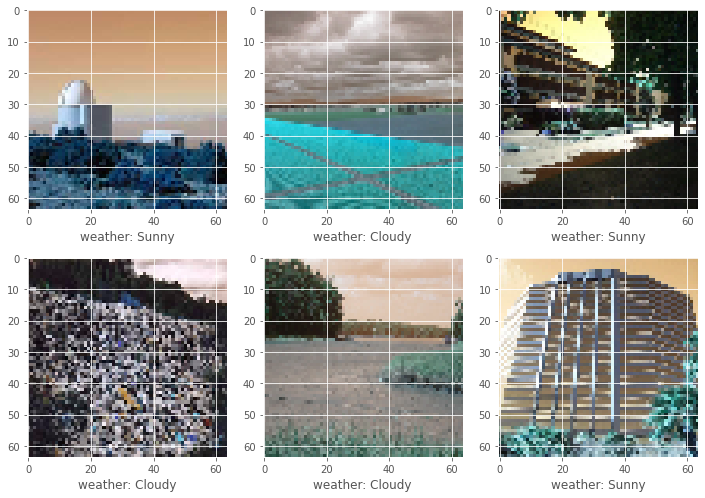

In [7]:
import random
plt.style.use('ggplot')
fig=plt.figure(figsize=(12,10))
fig.set_size_inches(10,10)
for i in range(6):
    plt.subplot(3,3,i+1)
    sample = random.randint(0,len(y))
    plt.imshow(x[sample])
    plt.xlabel("weather: {}".format(y[sample]))
plt.tight_layout()

In [8]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
le=LabelEncoder()
y=le.fit_transform(y)
y=to_categorical(y,2)

In [9]:
data = np.array(x)
labels = np.array(y)

print(data.shape)
print(labels.shape)

(10000, 64, 64, 3)
(10000, 2)


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels,
                                                    test_size = 0.2,
                                                    random_state = 101,
                                                    shuffle = True)
print('training:')
print(X_train.shape)
print(y_train.shape)
print('testing:')
print(X_test.shape)
print(y_test.shape)

training:
(8000, 64, 64, 3)
(8000, 2)
testing:
(2000, 64, 64, 3)
(2000, 2)


In [11]:
# make the data that can be used by the CNN
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagenerator = ImageDataGenerator(horizontal_flip = True, vertical_flip = True)
augmented_training_data = datagenerator.flow(X_train, y_train, batch_size = 32)

In [28]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout
cnn = Sequential()
cnn.add(Convolution2D(filters = 32, kernel_size = (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
cnn.add(MaxPooling2D(pool_size = (3, 3), strides = 2))
cnn.add(Dropout(rate = 0.2))
cnn.add(Convolution2D(filters = 64, kernel_size = (3, 3)))
cnn.add(MaxPooling2D(pool_size = (3, 3), strides = 2))
cnn.add(Dropout(rate = 0.2))
cnn.add(Convolution2D(filters = 64, kernel_size = (3, 3)))
cnn.add(MaxPooling2D(pool_size = (3, 3), strides = 2))
cnn.add(Dropout(rate = 0.2))
cnn.add(Flatten())
cnn.add(Dense(units = 64, activation = 'relu'))
cnn.add(Dense(units = 128, activation = 'relu'))
cnn.add(Dense(units = 2, activation = 'softmax'))
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [29]:
cnn.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 64)       

In [30]:
history = cnn.fit_generator(augmented_training_data, epochs = 50)

Epoch 1/50
250/250 [==============================] - 2s 7ms/step - loss: 5.2001 - accuracy: 0.5451
Epoch 2/50
250/250 [==============================] - 2s 6ms/step - loss: 0.6212 - accuracy: 0.6810
Epoch 3/50
250/250 [==============================] - 2s 6ms/step - loss: 0.4920 - accuracy: 0.7606
Epoch 4/50
250/250 [==============================] - 2s 6ms/step - loss: 0.4275 - accuracy: 0.8075
Epoch 5/50
250/250 [==============================] - 2s 6ms/step - loss: 0.4353 - accuracy: 0.7912
Epoch 6/50
250/250 [==============================] - 2s 6ms/step - loss: 0.4101 - accuracy: 0.8115
Epoch 7/50
250/250 [==============================] - 2s 6ms/step - loss: 0.3871 - accuracy: 0.8308
Epoch 8/50
250/250 [==============================] - 2s 6ms/step - loss: 0.3743 - accuracy: 0.8336
Epoch 9/50
250/250 [==============================] - 2s 6ms/step - loss: 0.3673 - accuracy: 0.8344
Epoch 10/50
250/250 [==============================] - 2s 6ms/step - loss: 0.3619 - accuracy: 0.8412

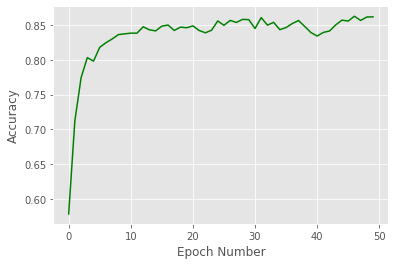

In [31]:
import matplotlib.pyplot as plt
plt.plot(history.epoch, history.history['accuracy'], color = 'green')
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.show()

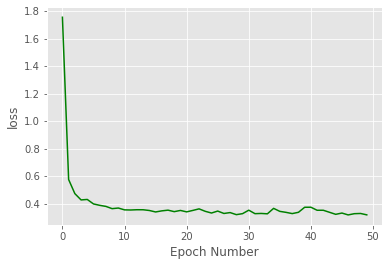

In [32]:
# plotting the losses
plt.plot(history.epoch, history.history['loss'], color = 'green')
plt.xlabel('Epoch Number')
plt.ylabel('loss')
plt.show()

In [22]:
cnn.evaluate(X_test, y_test)

63/63 [==============================] - 0s 4ms/step - loss: 0.4866 - accuracy: 0.8130


[0.4865575134754181, 0.8130000233650208]

In [23]:
from sklearn.metrics import confusion_matrix
y_true = np.argmax(y_test, axis = 1) # decoding
predicted_classes = cnn.predict_classes(X_test)
confusion_mat = confusion_matrix(y_true, predicted_classes)

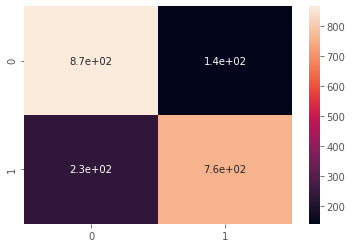

In [24]:
import seaborn as sns
sns.heatmap(confusion_mat, annot = True)
plt.show()